<a href="https://colab.research.google.com/github/kiberbull/AZSII/blob/main/prz5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Подключение Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Переключение в рабочую директорию
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ASZI')

# Установка необходимых библиотек
!pip install art adversarial-robustness-toolbox foolbox tensorflow numpy matplotlib sklearn

# Импорты
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import ProjectedGradientDescent
import foolbox as fb



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# Загрузка обученной модели
model = load_model('mnist_model.h5')

# Компиляция модели вручную
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [3]:
# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Подготовка данных
x_test = x_test.astype(np.float32) / 255.0  # Нормализация данных
x_test = np.expand_dims(x_test, axis=-1)   # Добавление размерности канала
y_test_one_hot = to_categorical(y_test, 10)  # Преобразование меток в one-hot формат



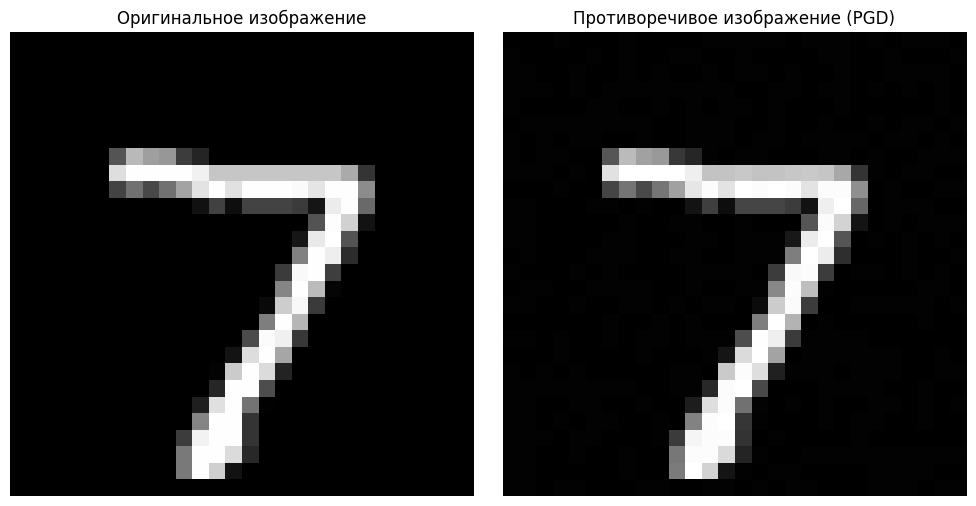

In [5]:
# Создание Foolbox модели
fmodel = fb.models.TensorFlowModel(model, bounds=(0, 1))

# Создание PGD-атаки
attack = fb.attacks.LinfPGD()

# Выбор изображения для атаки
image = tf.convert_to_tensor(x_test[0].reshape(1, 28, 28, 1), dtype=tf.float32)  # Преобразование изображения
label = np.argmax(y_test[0])  # Индекс класса
label_tensor = tf.convert_to_tensor([label], dtype=tf.int32)  # Преобразование метки в тензор с нужной формой

# Выполнение атаки
adversarial_image, _, success = attack(fmodel, image, label_tensor, epsilons=0.01)

# Визуализация
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(tf.squeeze(image).numpy(), cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение (PGD)")
plt.imshow(tf.squeeze(adversarial_image).numpy(), cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()
